In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
%matplotlib inline

In [2]:
female_results = '/Users/daniel/Downloads/MA_Exercise_20170112/MA_Exer_PikesPeak_Females.txt'
male_results = '/Users/daniel/Downloads/MA_Exercise_20170112/MA_Exer_PikesPeak_Males.txt'

In [3]:
df_males = pd.read_csv(male_results, sep='\t', encoding = "ISO-8859-1")
df_females = pd.read_csv(female_results, sep='\t', encoding = "ISO-8859-1")

In [4]:
df_females['Gender'] = 'Female'
df_males['Gender'] = 'Male'
df = pd.concat([df_males, df_females])

In [5]:
df['Gun Tim'] = df['Gun Tim'].str.extract('([0-9:]+)', expand = False)
df['Net Tim'] = df['Net Tim'].str.extract('([0-9:]+)', expand = False)
df['Pace'] = df['Pace'].str.extract('([0-9:]+)', expand = False)

In [6]:
def calculate_time_in_minutes(runtime):
    '''
    Accepts Pandas series of times in format hh:mm:ss
    Returns Pandas series of times in minutes
    '''
    df_h_m_s = runtime.str.extract('^(?:(?:(\d+):)?(\d+):)?(\d+)$', expand=True)
    df_h_m_s.fillna(0, inplace=True)
    columns = ['Hours', 'Minutes', 'Seconds']
    df_h_m_s.columns = columns
    for col in columns:
        df_h_m_s[col] = pd.to_numeric(df_h_m_s[col])
    return df_h_m_s['Hours'] * 60 + df_h_m_s['Minutes'] + df_h_m_s['Seconds']/60

In [7]:
# calculate runtime in fractions of Minutes
df['Gun Tim'] = calculate_time_in_minutes(df['Gun Tim'])
df['Net Tim'] = calculate_time_in_minutes(df['Net Tim'])
df['Pace'] = calculate_time_in_minutes(df['Pace'])

In [8]:
df['time_diff'] = df['Gun Tim'] - df['Net Tim']

In [9]:
df['Place'] = df['Div/Tot'].str.split('/').str.get(0)
df['Participants'] = df['Div/Tot'].str.split('/').str.get(1)

In [10]:
age_groups = [-1.5, 14.5,19.5,24.5,29.5,34.5,39.5, 44.5, 
              49.5, 54.5, 59.5, 64.5, 69.5, 74.5, 79.5, 100]
labels = ['Under 14', '15-19', '20-24', '25-29', 
          '30-34', '35-39', '40-44', '45-49', '50-54', 
          '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

In [11]:
df['Age_Group'] = pd.cut(df.Ag, bins=age_groups, labels = labels)

In [12]:
def mode(data):
    return mstats.mode(data).mode[0]
def time_range(data):
    return data.max() - data.min()
results_by_gender = df.groupby('Gender')['Net Tim'].agg(['mean', 'median', mode, time_range])
results_by_gender

,mean,median,mode,time_range
Gender,,,,
Female,58.474736,57.850000,48.100000,73.85
Male,52.132516,51.383333,35.466667,71.85


In [13]:
m_mu = results_by_gender['mean']['Male']
m_med = results_by_gender['median']['Male']
m_mod = results_by_gender['mode']['Male']
m_range = results_by_gender['time_range']['Male']

f_mu = results_by_gender['mean']['Female']
f_med = results_by_gender['median']['Female']
f_mod = results_by_gender['mode']['Female']
f_range = results_by_gender['time_range']['Female']

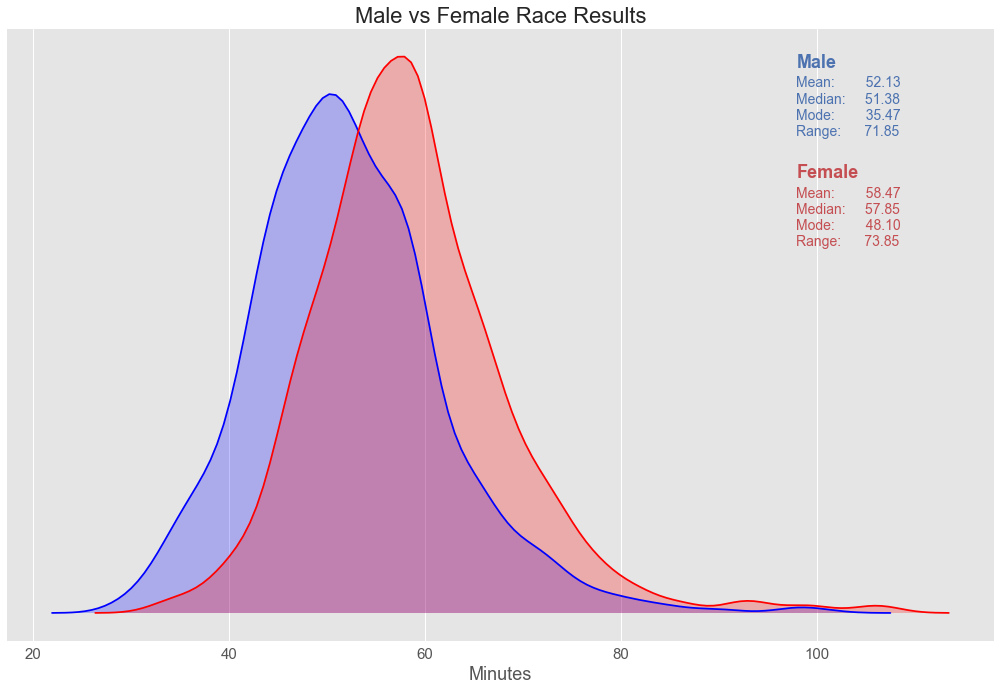

In [14]:
plt.style.use('ggplot')
#sns.set(style="white")
f, axes = plt.subplots(1, 1, figsize=(14, 10))
sns.distplot(df['Net Tim'][df.Gender=='Male'].values, 
             color = 'b', hist=False, kde_kws={"shade": True})
sns.distplot(df['Net Tim'][df.Gender=='Female'].values, 
             color = 'r', hist=False, kde_kws={"shade": True});

axes.text(0.8, 0.93, 
       'Male',
        verticalalignment='bottom', horizontalalignment='left',
        transform=axes.transAxes,
        color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
        fontsize=18, 
        fontweight='bold')
axes.text(0.8, 0.82, 
       'Mean: {:12.2f}\nMedian: {:9.2f}\nMode: {:12.2f}\nRange: {:10.2f}'.format(m_mu,m_med, m_mod, m_range),
        verticalalignment='bottom', horizontalalignment='left',
        transform=axes.transAxes,
        color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 
        fontsize=14)
        #bbox={'facecolor':'white'})
axes.text(0.8, 0.75, 
       'Female',
        verticalalignment='bottom', horizontalalignment='left',
        transform=axes.transAxes,
        color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804), fontsize=18, fontweight='bold')
axes.text(0.8, 0.64, 
       'Mean: {:12.2f}\nMedian: {:9.2f}\nMode: {:12.2f}\nRange: {:10.2f}'.format(f_mu,f_med, f_mod, f_range),
        verticalalignment='bottom', horizontalalignment='left',
        transform=axes.transAxes,
        color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804), 
        fontsize=14)
        #bbox={'facecolor':'white'})

plt.tick_params(axis='x', which='major', labelsize=15)
plt.setp(axes, yticks=[])
plt.tight_layout()
axes.set_xlabel('Minutes', fontsize=18)
sns.despine(left=True)
plt.gcf().subplots_adjust(bottom=0.1)
plt.gcf().subplots_adjust(top=0.95)
f.suptitle('Male vs Female Race Results', fontsize=22)
f.savefig('ques1')

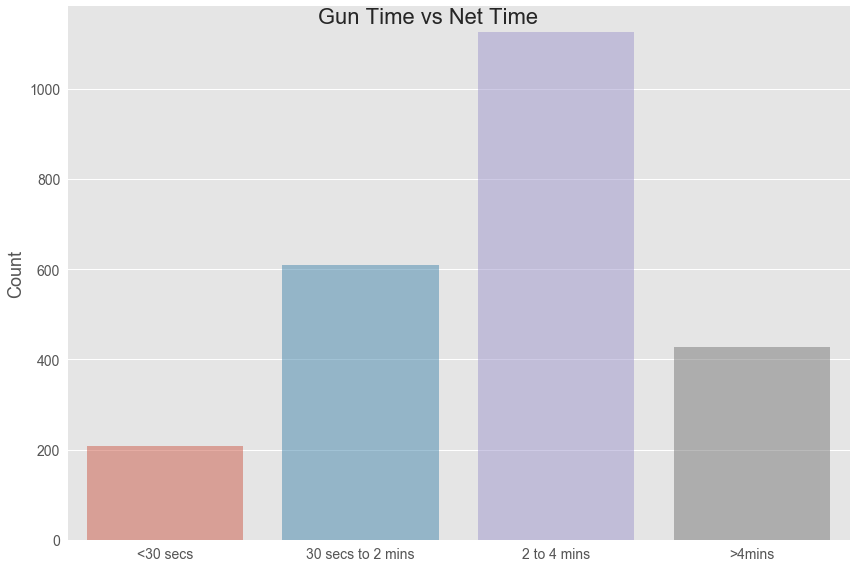

In [15]:
plt.style.use('ggplot')
#sns.set(style="white")
f, axes = plt.subplots(1, 1, figsize=(12, 8))
cutoffs = [-.1, .5, 1.5 ,4, 12]
labels = ['<30 secs', '30 secs to 2 mins','2 to 4 mins','>4mins']

d = pd.cut(df['Gun Tim']-df['Net Tim'], bins=cutoffs, labels = labels)

sns.countplot(d, alpha=.5)
plt.tick_params(axis='both', which='major', labelsize=14)
axes.set_ylabel('Count', fontsize=18)
f.suptitle('Gun Time vs Net Time', fontsize=22)
f.savefig('ques2')
sns.despine()
plt.tight_layout();

In [16]:
chris = df[df.Name=="Chris Doe"]
chris

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Gender,time_diff,Participants,Age_Group
534,108,108/214,2869,Chris Doe,44.0,Reson VA,53.116667,49.716667,8.0,Male,3.4,214,40-44


In [17]:
chris_age_group = df[(df.Age_Group=='40-44') & (df.Gender == 'Male')]

In [18]:
top_percent = chris_age_group.iloc[:21]

In [19]:
np.mean(top_percent['Net Tim']) - 49.71667

-11.812701746031749

In [20]:
from scipy.stats import ttest_1samp, ttest_ind

In [21]:
t_stat, p_value = ttest_1samp(top_percent['Net Tim'], 49.716667)
p_value

1.5088336886454119e-15

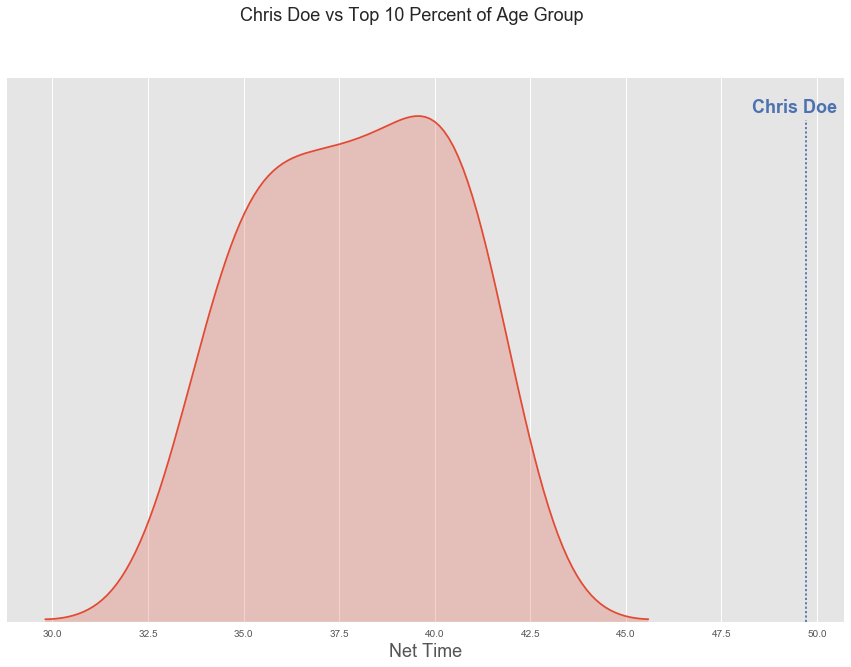

In [22]:
plt.style.use('ggplot')

f, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.distplot(top_percent['Net Tim'], hist=False, kde_kws={"shade": True})
axes.set_xlabel('Net Time', fontsize=18)
axes.text(0.89, 0.93, 
       'Chris Doe',
        verticalalignment='bottom', horizontalalignment='left',
        transform=axes.transAxes,
        color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
        fontsize=18, 
        fontweight='bold')
plt.setp(axes, yticks=[])
sns.despine(left=True)
f.suptitle('Chris Doe vs Top 10 Percent of Age Group', fontsize=18)
axes.set_ylim([0,.13])
axes.vlines(x=49.7167, 
            ymin=0, 
            ymax=.12, 
            color = (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 
            linestyles=':')

f.savefig('ques3')

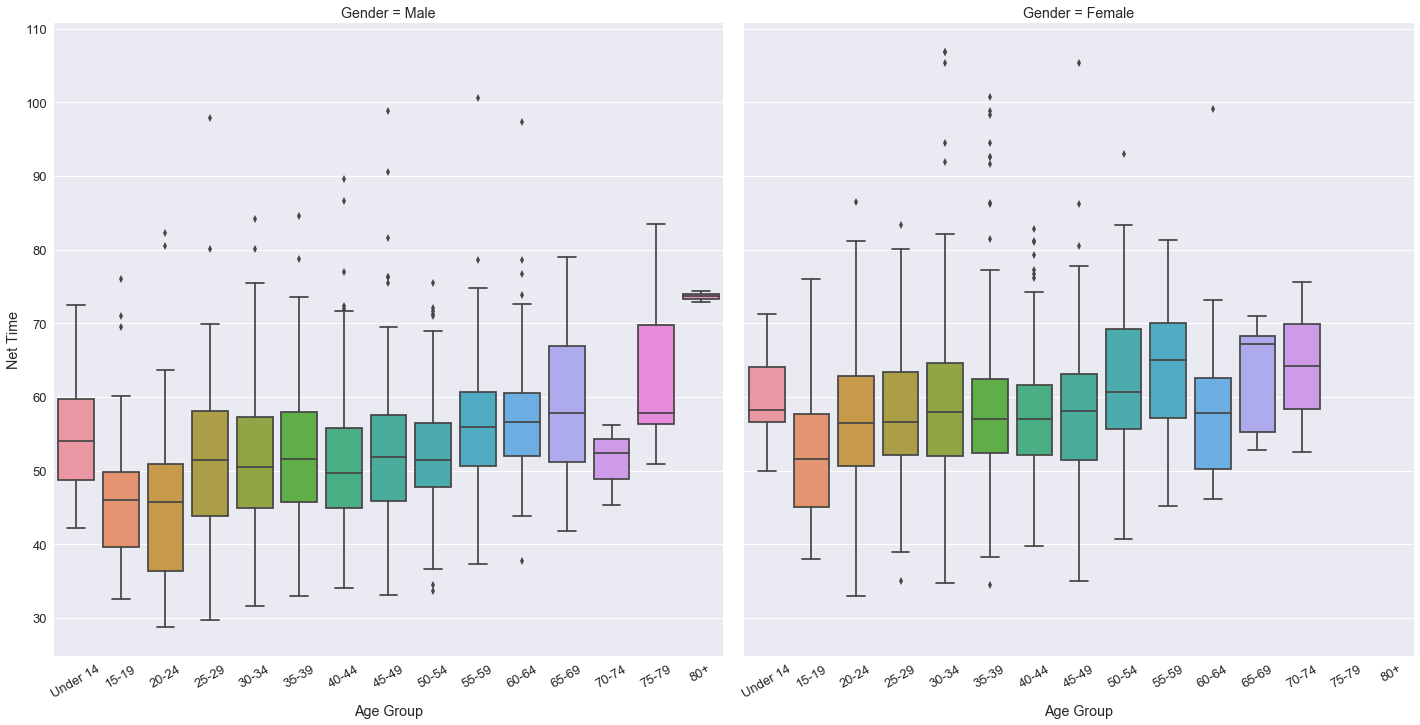

In [23]:
sns.set(font_scale=1.3)
sns_plot = sns.factorplot(x='Age_Group', y='Net Tim', col='Gender', data=df, kind='box', size=10)
sns_plot.set_ylabels('Net Time')
sns_plot.set_xticklabels(rotation=30)
sns_plot.set_xlabels('Age Group')

In [24]:
sns_plot.savefig('ques4')